In [37]:
import os
import pandas as pd

current_dir = os.getcwd()
final_path = os.path.join(current_dir, '..', 'data', 'final', 'final.csv')

final_df = pd.read_csv(final_path)

### Przygotowanie danych

In [38]:
from util import prepare_final

final_df = prepare_final(final_df)

final_df.head()

,premium_user,popularity_mean,popularity_std,popularity_mode,popularity_median,popularity_min,popularity_max,duration_ms_mean,duration_ms_std,duration_ms_mode,...,q,r,s,t,u,v,w,x,y,z
0,False,-0.997069,-0.995204,-0.973336,-0.996697,-0.319064,-0.994713,-1.059379,-0.409611,-0.825471,...,0,1,0,1,1,0,1,0,0,0
1,False,1.066575,0.740434,1.503039,1.097880,2.270742,0.713372,0.661699,-0.043242,1.674050,...,0,1,0,1,0,1,1,0,0,0
2,False,-0.997069,-0.995204,-0.973336,-0.996697,-0.319064,-0.994713,-1.429353,-0.963033,-0.008440,...,0,1,1,0,1,0,0,0,0,0
3,False,-0.997069,-0.995204,-0.973336,-0.996697,-0.319064,-0.994713,-1.192440,-0.607767,-0.537427,...,0,1,0,1,1,1,1,0,1,0
4,False,1.056186,1.104850,1.382240,1.041270,0.544205,0.968310,0.678373,-0.770022,0.873527,...,0,1,1,1,1,0,0,0,0,0


In [39]:
from sklearn.model_selection import train_test_split

X = final_df.drop('premium_user', axis=1)
y = final_df['premium_user']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Klasyfikator Random Forest
Uczenie

In [40]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

Accuracy: 0.81
ROC AUC: 0.87
Precision: 0.82
Recall: 0.70
F1 Score: 0.75


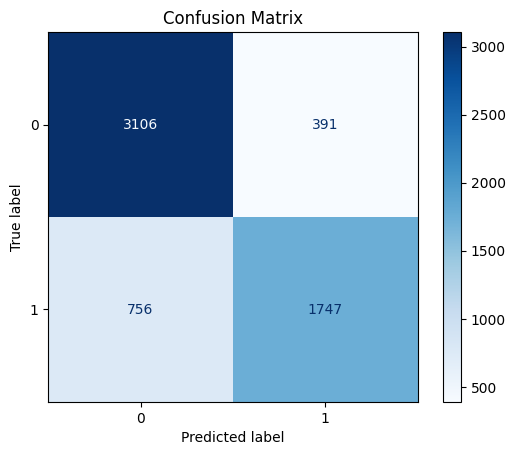

In [41]:
import sklearn.metrics as metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {roc_auc:.2f}')

precision = metrics.precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

recall = metrics.recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

f1 = metrics.f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Selekcja atrybutów

In [62]:
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

n = 30
selected_features = X_train.columns[indices][:n]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected.head()

,skip_play_ratio,timestamp_diff_median,daily_activity_max,skip_count,weekly_activity_max,like_count,like_play_ratio,monthly_activity,weekly_activity,daily_activity,...,duration_ms_median,unique_track_count,play_count,unique_artist_count,valence_mean,speechiness_mean,release_year_std,instrumentalness_std,acousticness_mean,acousticness_median
21753,1.148967,-1.064172,-0.082970,0.248699,-0.306944,0.008853,0.893592,0.342104,0.356659,0.633184,...,1.150908,-0.796238,-0.890123,-0.636550,-1.284575,-0.778886,-0.977819,-0.403777,-1.029090,-1.028514
251,1.276084,-1.209049,0.725624,0.699199,0.305384,0.263062,0.732191,0.858345,1.451364,1.812973,...,0.985024,-0.272982,-0.425848,-0.423377,-0.771339,-1.079239,-0.916620,-0.877007,-1.016714,-0.999324
22941,1.310879,-1.095991,0.850024,1.049588,0.399588,0.655929,0.870949,0.443947,0.957071,1.280262,...,1.033556,0.168194,-0.034400,0.024288,-0.950466,-0.768272,-1.013101,-1.433380,-1.032443,-0.999324
618,1.241430,-1.324965,0.601225,1.487574,2.001061,1.233676,0.982545,0.981529,0.921884,0.057735,...,0.899744,0.794049,0.575530,0.962253,-0.809741,-0.927810,-1.054808,-1.345166,-1.021179,-1.028737
17090,-0.886245,0.955687,-0.953764,-0.902578,-0.966375,-1.077310,-1.072747,-0.625057,-0.318037,-0.093952,...,-1.031560,-1.360533,-1.317985,-1.382658,1.716267,1.045649,1.168762,1.113183,1.062402,1.011460


In [63]:
clf_selected = RandomForestClassifier(n_estimators=200)
clf_selected.fit(X_train_selected, y_train)

y_pred_selected = clf_selected.predict(X_test_selected)
y_pred_proba_selected = clf_selected.predict_proba(X_test_selected)[:, 1]

Accuracy: 0.80
ROC AUC: 0.87
Precision: 0.80
Recall: 0.70
F1 Score: 0.75


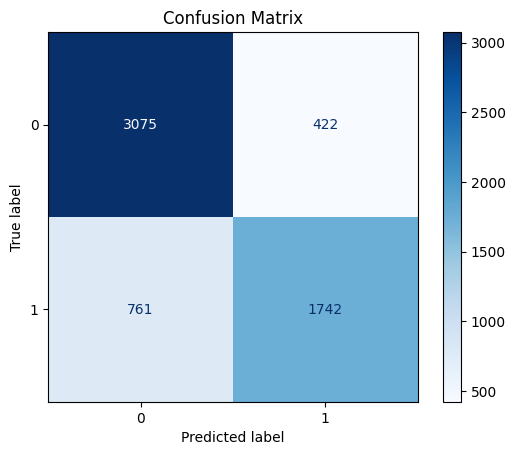

In [64]:
accuracy = metrics.accuracy_score(y_test, y_pred_selected)
print(f'Accuracy: {accuracy:.2f}')

roc_auc = metrics.roc_auc_score(y_test, y_pred_proba_selected)
print(f'ROC AUC: {roc_auc:.2f}')

precision = metrics.precision_score(y_test, y_pred_selected)
print(f'Precision: {precision:.2f}')

recall = metrics.recall_score(y_test, y_pred_selected)
print(f'Recall: {recall:.2f}')

f1 = metrics.f1_score(y_test, y_pred_selected)
print(f'F1 Score: {f1:.2f}')

cm = metrics.confusion_matrix(y_test, y_pred_selected)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [65]:
selected_path = os.path.join(current_dir, '..', 'data', 'final', 'selected.csv')
X_selected = X[selected_features]
X_selected.to_csv(selected_path, index=False)

Index(['skip_play_ratio', 'timestamp_diff_median', 'daily_activity_max',
       'skip_count', 'weekly_activity_max', 'like_count', 'like_play_ratio',
       'monthly_activity', 'weekly_activity', 'daily_activity',
       'timestamp_diff_std', 'session_count', 'timestamp_diff_mean',
       'city_frequency', 'danceability_median', 'danceability_mean',
       'monthly_activity_max', 'skip_like_ratio', 'explicit_count',
       'release_year_mean', 'duration_ms_median', 'unique_track_count',
       'play_count', 'unique_artist_count', 'valence_mean', 'speechiness_mean',
       'release_year_std', 'instrumentalness_std', 'acousticness_mean',
       'acousticness_median'],
      dtype='object')


<Axes: >

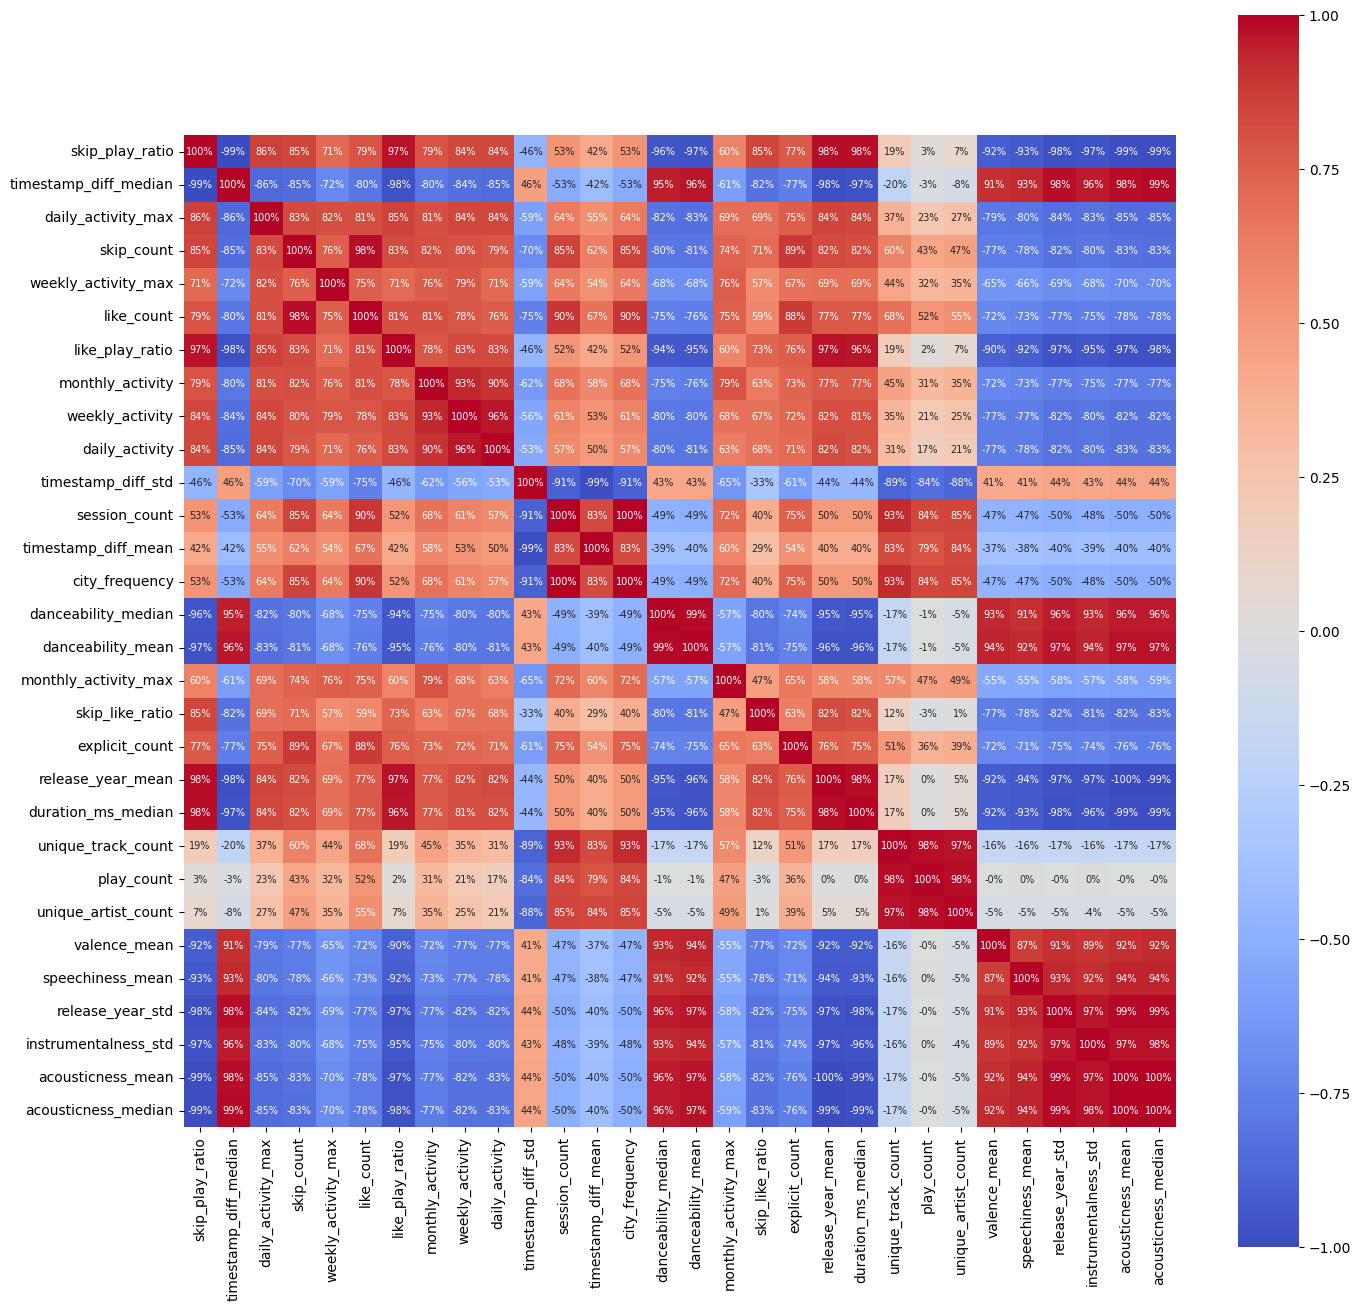

In [66]:
import seaborn as sns

continuous_fields = X_selected.select_dtypes(include=['float64', 'int64'])

print(continuous_fields.columns)

corr_matrix = continuous_fields.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', square=True, annot=True, annot_kws={'fontsize': 7}, fmt='.0%', vmin=-1, vmax=1)

array([[<Axes: title={'center': 'skip_play_ratio'}>,
        <Axes: title={'center': 'timestamp_diff_median'}>,
        <Axes: title={'center': 'daily_activity_max'}>,
        <Axes: title={'center': 'skip_count'}>,
        <Axes: title={'center': 'weekly_activity_max'}>],
       [<Axes: title={'center': 'like_count'}>,
        <Axes: title={'center': 'like_play_ratio'}>,
        <Axes: title={'center': 'monthly_activity'}>,
        <Axes: title={'center': 'weekly_activity'}>,
        <Axes: title={'center': 'daily_activity'}>],
       [<Axes: title={'center': 'timestamp_diff_std'}>,
        <Axes: title={'center': 'session_count'}>,
        <Axes: title={'center': 'timestamp_diff_mean'}>,
        <Axes: title={'center': 'city_frequency'}>,
        <Axes: title={'center': 'danceability_median'}>],
       [<Axes: title={'center': 'danceability_mean'}>,
        <Axes: title={'center': 'monthly_activity_max'}>,
        <Axes: title={'center': 'skip_like_ratio'}>,
        <Axes: title={'ce

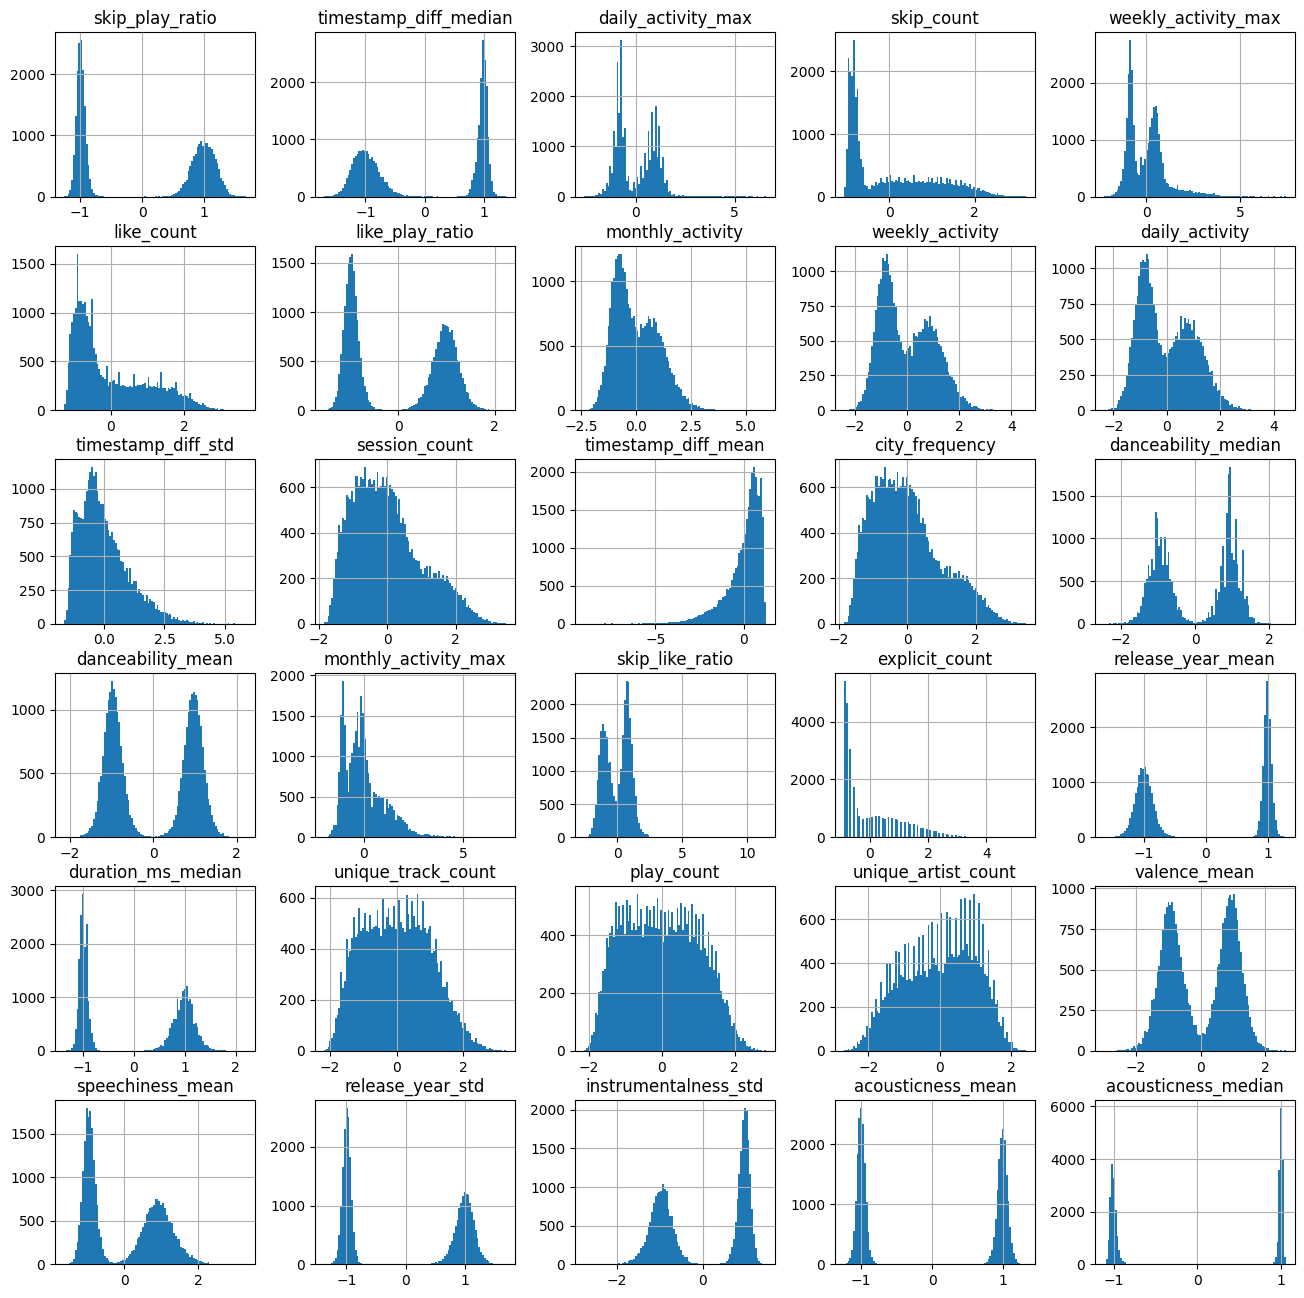

In [67]:
continuous_fields.hist(figsize=(16, 16), bins=100)

Save models

In [68]:
import joblib

model_path = os.path.join(current_dir, 'trained', 'rf_model.joblib')
model_selected_path = os.path.join(current_dir, 'trained', 'rf_selected_model.joblib')

joblib.dump(clf, model_path)
joblib.dump(clf_selected, model_selected_path)

['c:\\_prog\\vm_shared\\Account-Classifier\\models\\trained\\rf_selected_model.joblib']